# Data Preprocessing

In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [658]:
df = pd.read_csv("newData.csv")

#### Add Date Time Columns

In [659]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['Create Date/Time'] = pd.to_datetime(df['Create Date/Time'], format="%Y-%m-%d %H:%M:%S")
df['hour'] = df['Create Date/Time'].dt.hour
df['date'] = df['Create Date/Time'].dt.date
df['weekDay'] = df['Create Date/Time'].dt.dayofweek#.map(dw_mapping)

df = df[['Event Type', 'Circle', 'Police Station', 'Latitude', 'Longitude', 'date', 'hour', 'weekDay']]
df.head(5)

Event Type Circle Police Station  Latitude  Longitude  \
0  Information Against Police     C1            PS1    26.834     81.008   
1            Threat In Person     C1            PS1    26.828     81.014   
2                     Dispute     C1            PS1    26.840     81.009   
3                    Gambling     C1            PS1    26.828     81.002   
4            Threat In Person     C1            PS1    26.834     81.033   

         date  hour  weekDay  
0  2021-04-01     0        3  
1  2021-04-01    12        3  
2  2021-04-01    12        3  
3  2021-04-01    13        3  
4  2021-04-01    13        3

#### Add Peek Timing Column


In [660]:

T_index = df['Event Type'].value_counts().index
Event_Type = []
hour_lst = {}
for i in range(24):
    hour_lst[i] = []

for i in T_index:
    temp_df = (df[df['Event Type'] == i])['hour'].value_counts(normalize=True)
    Event_Type.append(i)    
    for i in hour_lst.keys():
        try:
            hour_lst[i].append(temp_df[i])
        except:
            hour_lst[i].append(0)

HourEvent_df = pd.DataFrame(hour_lst,  index=Event_Type)

index_ = HourEvent_df.index
times_ = []

for i in HourEvent_df.values:
    max_h = 0
    index = 0
    for j in range(len(i)-1):
        val_ = (i[j] + i[j+1])
        if max_h < val_:
            max_h = val_
            index = j
    times_.append(index)

In [661]:
# from matplotlib.pyplot import figure
# figure(figsize=(20, 10))

# plt.scatter(index_, times_)

# plt.xticks(
#     rotation=45,
#     horizontalalignment='right',
#     fontweight='light',
#     fontsize='medium',
# )
# plt.ylabel("Time in 24 hours")

# x = [x for x in range(len(index_))]


# for i in range(len(x)):
#     plt.annotate(f'{times_[i]}:00\n{index_[i]}', (x[i], times_[i] + 0.2),  rotation=45)
# plt.show()

In [662]:
HourEvent_df = pd.DataFrame({"Event":index_,"Time": times_})

HoursEventDict = {}
for i in HourEvent_df.values:
    HoursEventDict[i[0]] = i[1]

In [663]:
df['peekTime'] = df['Event Type'].map(HoursEventDict)

In [664]:
df.head()

Event Type Circle Police Station  Latitude  Longitude  \
0  Information Against Police     C1            PS1    26.834     81.008   
1            Threat In Person     C1            PS1    26.828     81.014   
2                     Dispute     C1            PS1    26.840     81.009   
3                    Gambling     C1            PS1    26.828     81.002   
4            Threat In Person     C1            PS1    26.834     81.033   

         date  hour  weekDay  peekTime  
0  2021-04-01     0        3        22  
1  2021-04-01    12        3        20  
2  2021-04-01    12        3        20  
3  2021-04-01    13        3        16  
4  2021-04-01    13        3        20

#### Add No. of cases in same area columns


In [665]:
noOfCases = []

for i in df[['Latitude','Longitude']].values:
    noOfCases.append(len(df.loc[(df['Latitude'] == i[0]) & (df['Longitude'] == i[1])]))   

In [666]:
df['noOfCases'] = noOfCases

In [667]:
df.head()

Event Type Circle Police Station  Latitude  Longitude  \
0  Information Against Police     C1            PS1    26.834     81.008   
1            Threat In Person     C1            PS1    26.828     81.014   
2                     Dispute     C1            PS1    26.840     81.009   
3                    Gambling     C1            PS1    26.828     81.002   
4            Threat In Person     C1            PS1    26.834     81.033   

         date  hour  weekDay  peekTime  noOfCases  
0  2021-04-01     0        3        22          8  
1  2021-04-01    12        3        20          2  
2  2021-04-01    12        3        20          3  
3  2021-04-01    13        3        16          2  
4  2021-04-01    13        3        20          1

#### Add No. of cases in recent days in same area columns

In [668]:
from datetime import date, timedelta

In [669]:
no_Prev_day = 15
timeHistory =  date.fromisoformat('2021-06-30')-timedelta(days=no_Prev_day)

noOfRecentCases = []
for i in df[['Latitude','Longitude']].values:
    noOfRecentCases.append(len(df.loc[(df['Latitude'] == i[0]) & (df['Longitude'] == i[1]) & (df['date'] >= timeHistory)]))

In [670]:
df['noOfRecentCases'] = noOfRecentCases

In [671]:
df.head(10)

Event Type Circle Police Station  Latitude  Longitude  \
0  Information Against Police     C1            PS1    26.834     81.008   
1            Threat In Person     C1            PS1    26.828     81.014   
2                     Dispute     C1            PS1    26.840     81.009   
3                    Gambling     C1            PS1    26.828     81.002   
4            Threat In Person     C1            PS1    26.834     81.033   
5                     Missing     C1            PS1    26.826     81.011   
6  Information Against Police     C1            PS1    26.835     81.008   
7                       Theft     C1            PS1    26.839     81.026   
8                     Dispute     C1            PS1    26.835     81.026   
9                     Dispute     C1            PS1    26.841     81.015   

         date  hour  weekDay  peekTime  noOfCases  noOfRecentCases  
0  2021-04-01     0        3        22          8                1  
1  2021-04-01    12        3        20          2                0  
2  2021-04-01    12        3        20          3                1  
3  2021-04-01    13        3        16          2                0  
4  2021-04-01    13        3        20          1                0  
5  2021-04-01    14        3        22         13                0  
6  2021-04-01    14        3        22         21                3  
7  2021-04-01    15        3        17         58                6  
8  2021-04-01    19        3        20          1                0  
9  2021-04-01    20        3        20          3                0

#### Add No. of cases in recent days in neighbor area columns

In [672]:
no_Prev_day = 15
timeHistory =  date.fromisoformat('2021-06-30')-timedelta(days=no_Prev_day)

noOfRecentCasesNeighbor = []
for i in df[['Latitude','Longitude']].values:
    noOfRecentCasesNeighbor.append(len(df.loc[(df['Latitude'] > i[0]-0.0011) & (df['Latitude'] < i[0]+0.0011) 
                                    & (df['Longitude'] > i[1]-0.0011) & (df['Longitude'] < i[1]+0.0011) 
                                    & (df['date'] >= timeHistory)]))

In [673]:
df['noOfRecentCasesNeighbor'] = noOfRecentCasesNeighbor

In [674]:
df.head(10)

Event Type Circle Police Station  Latitude  Longitude  \
0  Information Against Police     C1            PS1    26.834     81.008   
1            Threat In Person     C1            PS1    26.828     81.014   
2                     Dispute     C1            PS1    26.840     81.009   
3                    Gambling     C1            PS1    26.828     81.002   
4            Threat In Person     C1            PS1    26.834     81.033   
5                     Missing     C1            PS1    26.826     81.011   
6  Information Against Police     C1            PS1    26.835     81.008   
7                       Theft     C1            PS1    26.839     81.026   
8                     Dispute     C1            PS1    26.835     81.026   
9                     Dispute     C1            PS1    26.841     81.015   

         date  hour  weekDay  peekTime  noOfCases  noOfRecentCases  \
0  2021-04-01     0        3        22          8                1   
1  2021-04-01    12        3        20          2                0   
2  2021-04-01    12        3        20          3                1   
3  2021-04-01    13        3        16          2                0   
4  2021-04-01    13        3        20          1                0   
5  2021-04-01    14        3        22         13                0   
6  2021-04-01    14        3        22         21                3   
7  2021-04-01    15        3        17         58                6   
8  2021-04-01    19        3        20          1                0   
9  2021-04-01    20        3        20          3                0   

   noOfRecentCasesNeighbor  
0                        4  
1                        0  
2                        2  
3                        0  
4                        0  
5                        0  
6                        5  
7                       13  
8                        1  
9                        0

#### Add Cluster Column based on the Geo Data

In [675]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random", n_clusters=40, n_init=10, max_iter=300, random_state=42)

# Fit Data 
kmeans.fit(df[['Latitude','Longitude']])
labels = kmeans.labels_

# send back into dataframe
df['cluster'] = labels

df.head()

Event Type Circle Police Station  Latitude  Longitude  \
0  Information Against Police     C1            PS1    26.834     81.008   
1            Threat In Person     C1            PS1    26.828     81.014   
2                     Dispute     C1            PS1    26.840     81.009   
3                    Gambling     C1            PS1    26.828     81.002   
4            Threat In Person     C1            PS1    26.834     81.033   

         date  hour  weekDay  peekTime  noOfCases  noOfRecentCases  \
0  2021-04-01     0        3        22          8                1   
1  2021-04-01    12        3        20          2                0   
2  2021-04-01    12        3        20          3                1   
3  2021-04-01    13        3        16          2                0   
4  2021-04-01    13        3        20          1                0   

   noOfRecentCasesNeighbor  cluster  
0                        4        1  
1                        0        0  
2                        2        1  
3                        0        0  
4                        0        7

# Split Data into X and Y

In [676]:
# X = df[['Latitude', 'Longitude', 'hour', 'weekDay', 'cluster']]
# X = df[['hour', 'weekDay', 'cluster']]
# X = df[['hour', 'weekDay', 'peekTime']]
# X = df[['Latitude', 'Longitude', 'hour', 'weekDay', 'peekTime']]
X = df.drop(['Event Type','date'], axis=1)

In [677]:
X.head()

Circle Police Station  Latitude  Longitude  hour  weekDay  peekTime  \
0     C1            PS1    26.834     81.008     0        3        22   
1     C1            PS1    26.828     81.014    12        3        20   
2     C1            PS1    26.840     81.009    12        3        20   
3     C1            PS1    26.828     81.002    13        3        16   
4     C1            PS1    26.834     81.033    13        3        20   

   noOfCases  noOfRecentCases  noOfRecentCasesNeighbor  cluster  
0          8                1                        4        1  
1          2                0                        0        0  
2          3                1                        2        1  
3          2                0                        0        0  
4          1                0                        0        7

In [678]:
X = pd.concat([X, pd.get_dummies(df['Circle'])], axis=1)
X = X.drop(['Circle'], axis=1)

X = pd.concat([X, pd.get_dummies(df['Police Station'])], axis=1)
X = X.drop(['Police Station'], axis=1)

# X = pd.concat([X, pd.get_dummies(df['peekTime'])], axis=1)
# X = X.drop(['peekTime'], axis=1)

X.head()

Latitude  Longitude  hour  weekDay  peekTime  noOfCases  noOfRecentCases  \
0    26.834     81.008     0        3        22          8                1   
1    26.828     81.014    12        3        20          2                0   
2    26.840     81.009    12        3        20          3                1   
3    26.828     81.002    13        3        16          2                0   
4    26.834     81.033    13        3        20          1                0   

   noOfRecentCasesNeighbor  cluster  C1  C2  PS1  PS2  PS3  PS4  
0                        4        1   1   0    1    0    0    0  
1                        0        0   1   0    1    0    0    0  
2                        2        1   1   0    1    0    0    0  
3                        0        0   1   0    1    0    0    0  
4                        0        7   1   0    1    0    0    0

In [570]:
Y = pd.get_dummies(df['Event Type'])
Y.head()

Accident  Accident Explosive  Animals Related  Animals Smugling  \
0         0                   0                0                 0   
1         0                   0                0                 0   
2         0                   0                0                 0   
3         0                   0                0                 0   
4         0                   0                0                 0   

   Assault/Riot/Commotion  Attempted Murder  Child Crime  \
0                       0                 0            0   
1                       0                 0            0   
2                       0                 0            0   
3                       0                 0            0   
4                       0                 0            0   

   Child Crime(Sexual Abuse)  Corona  \
0                          0       0   
1                          0       0   
2                          0       0   
3                          0       0   
4                          0       0   

   Crime On Phone Mobile Social Media Internet  ...  Suicide  Suicide Attempt  \
0                                            0  ...        0                0   
1                                            0  ...        0                0   
2                                            0  ...        0                0   
3                                            0  ...        0                0   
4                                            0  ...        0                0   

   Suspicious Object Information  Suspicious Person Information  Theft  \
0                              0                              0      0   
1                              0                              0      0   
2                              0                              0      0   
3                              0                              0      0   
4                              0                              0      0   

   Threat In Person  Threat On Phone Email Social Media  Traffic Jam  \
0                 0                                   0            0   
1                 1                                   0            0   
2                 0                                   0            0   
3                 0                                   0            0   
4                 1                                   0            0   

   Unclaimed Information  Unknown  
0                      0        0  
1                      0        0  
2                      0        0  
3                      0        0  
4                      0        0  

[5 rows x 54 columns]

# Split Data into Train And Test

In [571]:
from sklearn.model_selection import train_test_split

In [572]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, train_size=0.8)

In [573]:
X_train.shape, Y_train.shape

((4098, 15), (4098, 54))

In [574]:
X_test.shape, Y_test.shape

((1025, 15), (1025, 54))

# Create and Train ML Model

In [575]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [576]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
DT.fit(X_train, Y_train)

Y_pred = DT.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6019512195121951


# Tune Hyperparameters

In [577]:
for i in range(1, 10):
    DT = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    DT.fit(X_train, Y_train)
    Y_pred = DT.predict(X_test)
    print(i,"| Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

1 | Accuracy: 0.0
2 | Accuracy: 0.375609756097561
3 | Accuracy: 0.6019512195121951
4 | Accuracy: 0.5882926829268292
5 | Accuracy: 0.5658536585365853
6 | Accuracy: 0.6575609756097561
7 | Accuracy: 0.6146341463414634
8 | Accuracy: 0.6097560975609756
9 | Accuracy: 0.5824390243902439


In [578]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(X_train, Y_train)
Y_pred = DT.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6575609756097561


# Create and Train Neural Network

In [401]:
import tensorflow as tf

In [602]:
# Simple Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(15),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(54, activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 512)               8192      
                                                                 
 dense_88 (Dense)            (None, 256)               131328    
                                                                 
 dense_89 (Dense)            (None, 128)               32896     
                                                                 
 dense_90 (Dense)            (None, 54)                6966      
                                                                 
Total params: 179,382
Trainable params: 179,382
Non-trainable params: 0
_________________________________________________________________


In [603]:
num_epochs = 50
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test))

Epoch 1/50
129/129 [==============================] - 2s 7ms/step - loss: 3.1145 - accuracy: 0.2789 - val_loss: 2.6623 - val_accuracy: 0.2966
Epoch 2/50
129/129 [==============================] - 1s 5ms/step - loss: 2.5903 - accuracy: 0.2992 - val_loss: 2.5559 - val_accuracy: 0.2976
Epoch 3/50
129/129 [==============================] - 1s 5ms/step - loss: 2.5033 - accuracy: 0.3104 - val_loss: 2.4624 - val_accuracy: 0.3024
Epoch 4/50
129/129 [==============================] - 1s 5ms/step - loss: 2.3965 - accuracy: 0.3238 - val_loss: 2.3521 - val_accuracy: 0.3063
Epoch 5/50
129/129 [==============================] - 1s 5ms/step - loss: 2.3264 - accuracy: 0.3419 - val_loss: 2.2812 - val_accuracy: 0.4283
Epoch 6/50
129/129 [==============================] - 1s 7ms/step - loss: 2.2326 - accuracy: 0.3704 - val_loss: 2.2077 - val_accuracy: 0.3785
Epoch 7/50
129/129 [==============================] - 3s 23ms/step - loss: 2.1558 - accuracy: 0.3992 - val_loss: 2.1125 - val_accuracy: 0.4449
Epoch

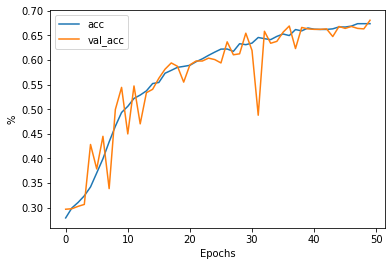

In [604]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('%')
plt.legend(['acc', 'val_acc'])
plt.show()

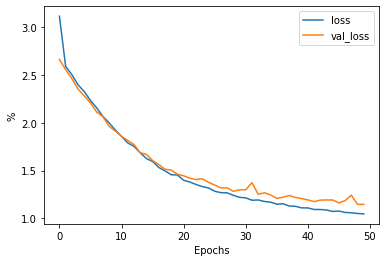

In [606]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('%')
plt.legend(['loss', 'val_loss'])
plt.show()

# Model Evaluation

In [607]:
from sklearn.metrics import confusion_matrix, classification_report

In [608]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5) 
Y_pred.shape

(1025, 54)

In [610]:
print(classification_report(Y_test, Y_pred, target_names=Y.columns))

                                                      precision    recall  f1-score   support

                                            Accident       0.00      0.00      0.00         5
                                  Accident Explosive       0.00      0.00      0.00         0
                                     Animals Related       0.00      0.00      0.00        13
                                    Animals Smugling       0.00      0.00      0.00         0
                              Assault/Riot/Commotion       0.00      0.00      0.00         1
                                    Attempted Murder       0.00      0.00      0.00         5
                                         Child Crime       0.00      0.00      0.00         1
                           Child Crime(Sexual Abuse)       0.00      0.00      0.00         2
                                              Corona       0.92      1.00      0.96        80
         Crime On Phone Mobile Social Media Internet       

c:\users\rajku\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rajku\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rajku\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [612]:
# cm = confusion_matrix(Y_test.values.argmax(axis=1), Y_pred.argmax(axis=1))
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# df_cm = pd.DataFrame(cm)
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm, annot=True)
# plt.show()


# Manual Testing

In [ ]:
model.predict

In [625]:
Circle = 'C1'
Police_Station = 'PS2'
Latitude = 26.876
Longitude = 81.055
hour = 12
weekDay = 2

c:\users\rajku\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [679]:
peekTime = hour

cluster = kmeans.predict([[Latitude, Longitude]])[0]

no_Prev_day = 15
timeHistory =  date.fromisoformat('2021-06-30')-timedelta(days=no_Prev_day)

noOfCases = len(df.loc[(df['Latitude'] == Latitude) & (df['Longitude'] == Longitude)])
noOfRecentCases = len(df.loc[(df['Latitude'] == Latitude) & (df['Longitude'] == Longitude) & (df['date'] >= timeHistory)])
noOfRecentCasesNeighbor = len(df.loc[(df['Latitude'] > Latitude-0.0011) & (df['Latitude'] < Latitude+0.0011) 
                                    & (df['Longitude'] > Longitude-0.0011) & (df['Longitude'] < Longitude+0.0011) 
                                    & (df['date'] >= timeHistory)])

if Circle == "C1":
    C1, C2 = 1, 0
elif Circle == "C2":
    C1, C2 = 0, 1
    
if Police_Station == "PS1":
    PS1, PS2, PS3, PS4 = 1,0,0,0
elif Police_Station == "PS2":
    PS1, PS2, PS3, PS4 = 0,1,0,0
elif Police_Station == "PS3":
    PS1, PS2, PS3, PS4 = 0,0,1,0
elif Police_Station == "PS4":
    PS1, PS2, PS3, PS4 = 0,0,0,1

c:\users\rajku\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [680]:
X.head()

Latitude  Longitude  hour  weekDay  peekTime  noOfCases  noOfRecentCases  \
0    26.834     81.008     0        3        22          8                1   
1    26.828     81.014    12        3        20          2                0   
2    26.840     81.009    12        3        20          3                1   
3    26.828     81.002    13        3        16          2                0   
4    26.834     81.033    13        3        20          1                0   

   noOfRecentCasesNeighbor  cluster  C1  C2  PS1  PS2  PS3  PS4  
0                        4        1   1   0    1    0    0    0  
1                        0        0   1   0    1    0    0    0  
2                        2        1   1   0    1    0    0    0  
3                        0        0   1   0    1    0    0    0  
4                        0        7   1   0    1    0    0    0

In [689]:
predictedEvent = model.predict([[Latitude,Longitude,hour,weekDay,peekTime,noOfCases,noOfRecentCases,noOfRecentCasesNeighbor,cluster,C1,C2,PS1,PS2,PS3,PS4]])
predictedEvent

array([[4.9072123e-16, 1.0345058e-04, 1.4802539e-28, 4.8208878e-20,
        2.2722097e-28, 4.5231106e-26, 1.3582937e-02, 5.2121406e-29,
        7.9985288e-17, 1.4848509e-29, 1.8832834e-01, 7.1197638e-04,
        7.7937305e-04, 4.2665935e-19, 2.5275348e-27, 1.0446585e-12,
        1.6473516e-08, 1.0122149e-02, 8.1284123e-04, 4.2758666e-18,
        7.8049183e-13, 6.8892806e-15, 2.1294125e-03, 2.0729763e-04,
        4.1179062e-04, 6.0229409e-06, 1.3342989e-06, 2.7005633e-03,
        1.9164646e-24, 4.6241128e-01, 2.3594255e-15, 3.0920607e-01,
        8.3501561e-31, 1.0987468e-15, 1.2292067e-04, 6.1437107e-18,
        1.5270591e-05, 1.4863510e-24, 7.4513860e-05, 1.0092589e-24,
        7.8290524e-03, 1.4277799e-17, 1.5878372e-07, 2.8048840e-04,
        3.1308353e-17, 6.0202620e-07, 5.7334206e-29, 3.6466172e-06,
        3.3913921e-06, 2.6602421e-15, 7.6101795e-05, 7.9002522e-05,
        1.3380485e-20, 2.1389579e-24]], dtype=float32)

In [690]:
predictedEventIndex = predictedEvent.argmax(axis=1)[0]
predictedEventIndex

29

In [694]:
print("Event Type:", Y.columns[predictedEventIndex], "\nProbability:", predictedEvent[0][predictedEventIndex])

Event Type: Kidnap 
Probability: 0.46241128


# Get Nearby Places Data

In [508]:
import requests

lat = 26.876
long = 81.055
limit = 5

url = "https://api.foursquare.com/v3/places/nearby?ll={}%2C{}&limit={}".format(lat, long, limit)

headers = {
    "Accept": "application/json",
    "Authorization": "fsq3AJY1p0lkNo9/6QWGrb7R1nZANvJeGz3EOnG9e8g39lA="
}

response = requests.request("GET", url, headers=headers)

print(response.text)

{"results":[{"fsq_id":"547f765f498ed66921cb4c69","categories":[{"id":12013,"name":"College and University","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/education/default_","suffix":".png"}}],"chains":[],"distance":1395,"geocodes":{"main":{"latitude":26.885100689513003,"longitude":81.04530048872046}},"location":{"address":"Near Bbd Green City","country":"IN","cross_street":"","locality":"Lucknow","postcode":"227105","region":"Uttar Pradesh"},"name":"BBD University","related_places":{},"timezone":"Asia/Kolkata"},{"fsq_id":"5fc62ebb1dd3ab439e5c1e68","categories":[{"id":10024,"name":"Movie Theater","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_","suffix":".png"}}],"chains":[],"distance":1402,"geocodes":{"main":{"latitude":26.888582,"longitude":81.056169}},"location":{"country":"IN","cross_street":"","locality":"Lucknow","postcode":"226028","region":"Uttar Pradesh"},"name":"Inox - Crown Mall","related_places":{"parent":{"fsq_id":"5e6e28

In [509]:
import json
print(json.dumps(json.JSONDecoder().raw_decode(response.text), indent=2))

[
  {
    "results": [
      {
        "fsq_id": "547f765f498ed66921cb4c69",
        "categories": [
          {
            "id": 12013,
            "name": "College and University",
            "icon": {
              "prefix": "https://ss3.4sqi.net/img/categories_v2/education/default_",
              "suffix": ".png"
            }
          }
        ],
        "chains": [],
        "distance": 1395,
        "geocodes": {
          "main": {
            "latitude": 26.885100689513003,
            "longitude": 81.04530048872046
          }
        },
        "location": {
          "address": "Near Bbd Green City",
          "country": "IN",
          "cross_street": "",
          "locality": "Lucknow",
          "postcode": "227105",
          "region": "Uttar Pradesh"
        },
        "name": "BBD University",
        "related_places": {},
        "timezone": "Asia/Kolkata"
      },
      {
        "fsq_id": "5fc62ebb1dd3ab439e5c1e68",
        "categories": [
          {
        